`ImportNecessaryLibraries`

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

`Boston Housing Dataset Columns`

1. CRIM:  
   Per capita crime rate by town. Indicates the level of crime in the area.

2. ZN:  
   Proportion of residential land zoned for lots over 25,000 sq.ft. Reflects the amount of land set aside for large residential properties.

3. INDUS:  
   Proportion of non-retail business acres per town. Measures industrial activity in the area.

   CHAS:  
   Charles River dummy variable (`1` if the tract bounds the river; `0` otherwise). Indicates proximity to the Charles River.

5. NOX:  
   Nitric oxides concentration (parts per 10 million). Measures air pollution levels.

6. RM:  
   Average number of rooms per dwelling. Indicates the size of the housing units.

7. AGE:  
   Proportion of owner-occupied units built prior to 1940. Reflects the age of the housing stock.

8. DIS:  
   Weighted distances to five Boston employment centers. Measures accessibility to job centers.

9. RAD:  
   Index of accessibility to radial highways. Indicates how well-connected the area is to major highways.

10. TAX:  
    Full-value property-tax rate per $10,000. Reflects the local tax burden.

11. PTRATIO:  
    Pupil-teacher ratio by town. Measures the quality of local education.

12. B:  
    `1000(Bk - 0.63)^2`, where `Bk` is the proportion of Black residents by town. A demographic measure.

13. LSTAT:  
    Percentage of lower status of the population. Indicates the socioeconomic status of residents.

14. MEDV:  
    Median value of owner-occupied homes in $1000's. This is the target variable, representing housing prices.

`LoadDataset`

In [4]:
df = pd.read_csv("BostonHousing.csv")

`ExtractingImportantFeatures`

In [ ]:
corr_matrix = df.corr()
# extract imp features for outlier detection.
important_features = corr_matrix["medv"].abs().sort_values(ascending=False)[1:6]  # Top 5 features
print("Top Important Features:\n\n",important_features)

Top Important Features:

 lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
Name: medv, dtype: float64


In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
important_features = ["lstat", "rm", "ptratio", "indus", "tax", "medv"] 
df= df[important_features]

In [9]:
# basic info..
print(" ")
print(" Info ...........")
print(" ")
df.info()
print(" ")
print(" Description ...........")
print(" ")
df.describe()


 
 Info ...........
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lstat    506 non-null    float64
 1   rm       506 non-null    float64
 2   ptratio  506 non-null    float64
 3   indus    506 non-null    float64
 4   tax      506 non-null    int64  
 5   medv     506 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.8 KB
 
 Description ...........
 


,lstat,rm,ptratio,indus,tax,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,12.653063,6.284634,18.455534,11.136779,408.237154,22.532806
std,7.141062,0.702617,2.164946,6.860353,168.537116,9.197104
min,1.730000,3.561000,12.600000,0.460000,187.000000,5.000000
25%,6.950000,5.885500,17.400000,5.190000,279.000000,17.025000
50%,11.360000,6.208500,19.050000,9.690000,330.000000,21.200000
75%,16.955000,6.623500,20.200000,18.100000,666.000000,25.000000
max,37.970000,8.780000,22.000000,27.740000,711.000000,50.000000


`CheckForMissingValues`

In [11]:
# Check for missing values and remove nulls
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("missing values dropped : )")
else: 
    print("Null report :\n",df.isnull().sum())
    print("\nNoMissingValues")


Null report :
 lstat      0
rm         0
ptratio    0
indus      0
tax        0
medv       0
dtype: int64

NoMissingValues


`VisualizingFeatureCorrelations`

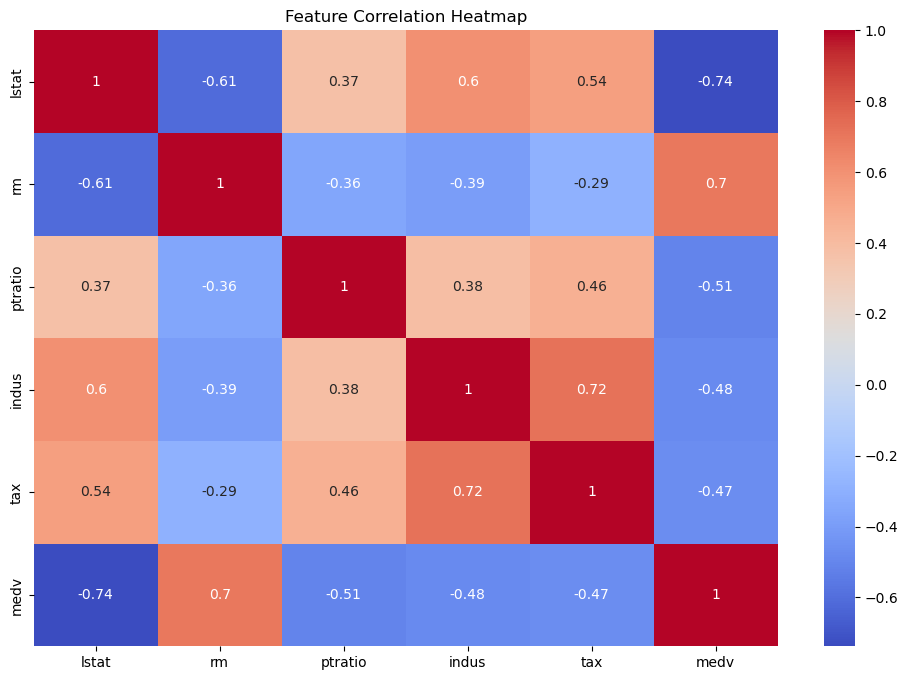

In [13]:
# Visualizing feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

`OutlierDetection`

In [ ]:
important_features = ["lstat", "rm", "ptratio", "indus", "tax", "medv"]
# Create a copy of the dataset
df_copy = df.copy()
for col in important_features:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)].index
    print(f"Feature: {col} | Outliers detected: {len(outliers)}")

    replacement_value = df_copy[col].mean()
    df_copy.loc[outliers, col] = replacement_value
  
print("\nOutiers replaced by random value")

Feature: lstat | Outliers detected: 15
Feature: rm | Outliers detected: 30
Feature: ptratio | Outliers detected: 7
Feature: indus | Outliers detected: 0
Feature: tax | Outliers detected: 0
Feature: medv | Outliers detected: 40

Outiers replaced by random value


In [190]:
df_copy

,lstat,rm,ptratio,indus,tax,medv
0,-1.459000,0.413672,-1.075562,-0.666608,-1.287909,24.0
1,-0.303094,0.194274,-0.492439,-0.987329,-0.593381,21.6
2,-0.303094,1.282714,-1.208727,-0.987329,-0.593381,34.7
3,0.113032,1.016303,-1.361517,-1.106115,-1.306878,33.4
4,0.113032,1.228577,-1.026501,-1.106115,-1.306878,36.2
...,...,...,...,...,...,...
501,1.176466,0.439316,-0.418147,-0.803212,0.115738,22.4
502,1.176466,-0.234548,-0.500850,-0.803212,0.115738,20.6
503,1.176466,0.984960,-0.983048,-0.803212,0.115738,23.9
504,1.176466,0.725672,-0.865302,-0.803212,0.115738,22.0


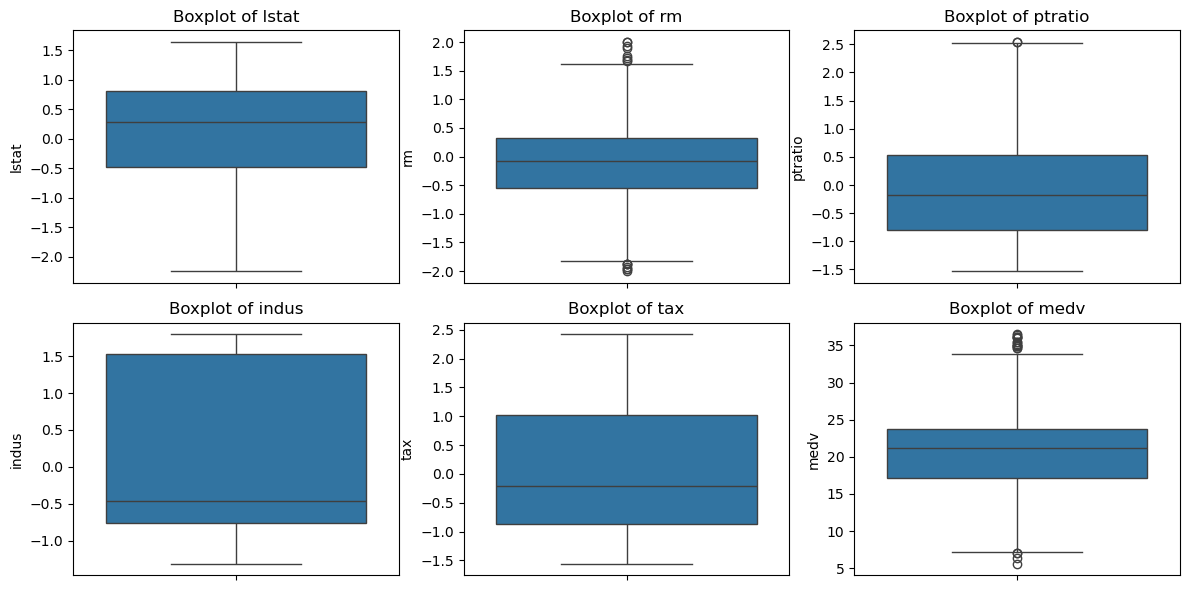

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(important_features):
    plt.subplot(2, 3, i + 1)  
    sns.boxplot(y=df_copy[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

`Further -> Scaling ,Preprocessing ,Training ,etc =>`

`Scaling..`

In [195]:
# Defining independent and dependent variables
X = df.drop(columns=['medv'])
y = df['medv']

X_ = df_copy.drop(columns=['medv'])
y_ = df_copy['medv']

In [197]:
# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_ = scaler.fit_transform(X_)
feature_names = [
    "indus", "rm","tax", "ptratio", "lstat"
]
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)
X_scaled_ = pd.DataFrame(X_scaled_, columns=feature_names)

df_scaled= pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["medv"] = df["medv"]
df_scaled_= pd.DataFrame(X_scaled_, columns=X.columns)
df_scaled_["medv"] = df["medv"]

In [198]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled_, y_, test_size=0.3, random_state=42)


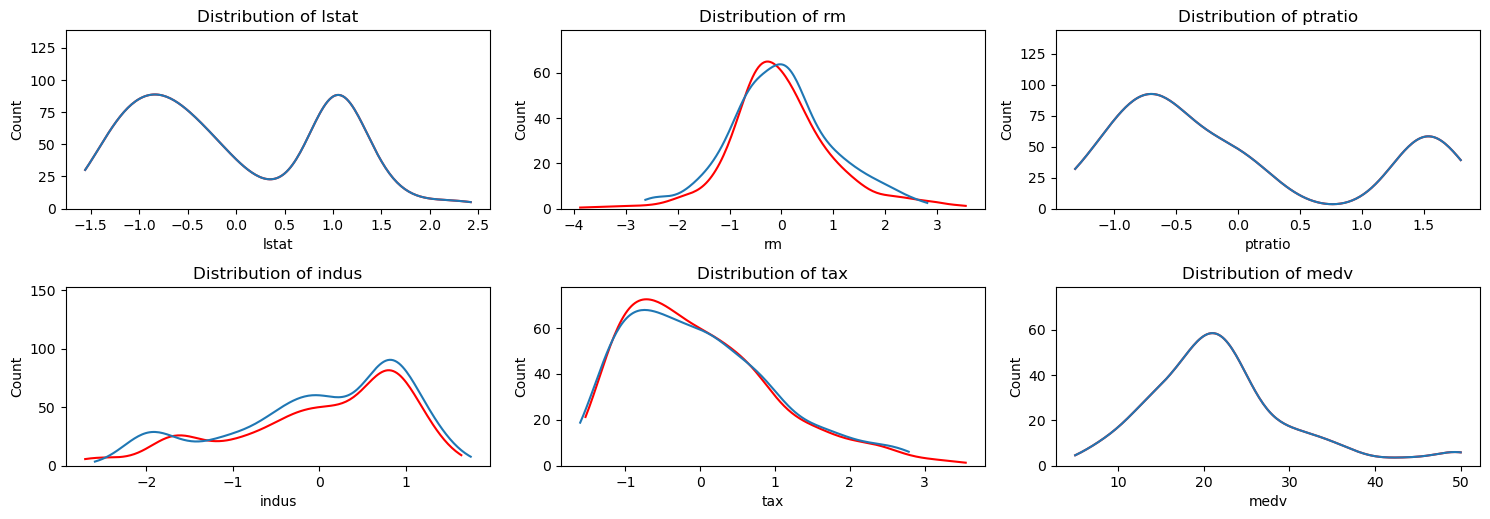

In [201]:

# Plot distribution of all numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_scaled.columns):
    plt.subplot(4, 3, i+1)  # Adjust based on number of columns
    sns.histplot(df_scaled[col], kde=True, alpha=0, linewidth=0, color="red")
    sns.histplot(df_scaled_[col], kde=True, alpha=0, linewidth=0)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### 

`CheckNormallity.`

##### no need for normalisation , not helpful

In [205]:
# from sklearn.preprocessing import MinMaxScaler
# # Apply MinMaxScaler
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)
# # Convert back to DataFrame
# df_n = pd.DataFrame(X_normalized, columns=X.columns)
# # Add the target variable back
# df_n["medv"] = df["medv"]
# # Display the first few rows
# df_n.head()

In [206]:
# # Plot distribution of all numerical features to detect outliers
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(df_scaled.columns):
#     plt.subplot(4, 3, i+1)  # Adjust based on number of columns
#     sns.histplot(df_scaled[col], kde=True, alpha=0, linewidth=0)
#     plt.title(f"Distribution of {col}")
# plt.tight_layout()
# plt.show()

`Check skewness`

In [208]:
print("Skewness & Kurtosis of Each Feature:\n")
for col in df_scaled.columns:
    skewness = df_scaled_[col].skew()
    kurtosis = df_scaled_[col].kurt()
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

Skewness & Kurtosis of Each Feature:

lstat: Skewness = 0.30, Kurtosis = -1.23
rm: Skewness = 0.18, Kurtosis = 0.27
ptratio: Skewness = 0.67, Kurtosis = -1.14
indus: Skewness = -0.68, Kurtosis = -0.58
tax: Skewness = 0.73, Kurtosis = -0.03
medv: Skewness = 1.11, Kurtosis = 1.50


In [209]:
print("Skewness & Kurtosis of Each Feature:\n")
for col in df_scaled.columns:
    skewness = df_scaled[col].skew()
    kurtosis = df_scaled[col].kurt()
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

Skewness & Kurtosis of Each Feature:

lstat: Skewness = 0.30, Kurtosis = -1.23
rm: Skewness = 0.40, Kurtosis = 1.89
ptratio: Skewness = 0.67, Kurtosis = -1.14
indus: Skewness = -0.80, Kurtosis = -0.29
tax: Skewness = 0.91, Kurtosis = 0.49
medv: Skewness = 1.11, Kurtosis = 1.50


In [210]:
# sns.histplot(df_scaled["medv"], kde=True, bins=40, alpha=0, linewidth=0)
df=df_scaled

`Model Training`

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

r2_lr

0.6499135956539919

In [ ]:
# Linear Regression for refined data
lr = LinearRegression()
lr.fit(X_train_, y_train_)
y_pred_lr_ = lr.predict(X_test_)
mae_lr_ = mean_absolute_error(y_test_, y_pred_lr_)
mse_lr_ = mean_squared_error(y_test_, y_pred_lr_)
rmse_lr_ = np.sqrt(mse_lr_)
r2_lr_ = r2_score(y_test_, y_pred_lr_)

r2_lr

0.6499135956539919

In [ ]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

r2_ridge

0.6502905136581578

In [ ]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

r2_lasso

0.639617860627258

In [ ]:
# Random Forest Reg
rf = RandomForestRegressor(n_estimators=120,max_depth=15, random_state=42,min_samples_split=2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf

0.8085273919712817

In [ ]:
# Saving ....
with open("boston_model.pkl", "wb") as model_file:
    pickle.dump(rf, model_file)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler have been saved as 'boston_model.pkl' and 'scaler.pkl'.")

Model and scaler have been saved as 'boston_model.pkl' and 'scaler.pkl'.
